## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 9.32 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [50]:
#1
airb = pd.read_csv('./kmc/data/airbnb_hw.csv')

In [51]:
airb['Clean_Price']=airb['Price']
airb['Clean_Beds']=airb['Beds']
airb['Clean_N_Reviews'] = airb['Number Of Reviews']
airb['Clean_Rev_Score']=airb['Review Scores Rating']

In [52]:
airb['Clean_Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [53]:
airb['Clean_Price'] = airb['Clean_Price'].str.replace(',','')
airb['Clean_Price'] = pd.to_numeric(airb['Clean_Price'],errors='coerce')

In [54]:
airb['Clean_Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [55]:
airb['Clean_Beds'] = airb['Clean_Beds'].fillna(1)

In [56]:
airb['Clean_N_Reviews'].unique()

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [57]:
pd.crosstab(airb['Clean_Rev_Score'].isnull(), airb['Clean_N_Reviews']>0)

Clean_N_Reviews,False,True
Clean_Rev_Score,,
False,0,22155
True,7814,509


In [58]:
X = airb.loc[:,['Clean_Price','Clean_Beds','Clean_N_Reviews','Clean_Rev_Score']]
X = X.dropna()
X.describe()

,Clean_Price,Clean_Beds,Clean_N_Reviews,Clean_Rev_Score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [59]:
#2
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = X.drop('Clean_Price',axis=1)
Z = Z.apply(maxmin)

In [60]:
#3
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

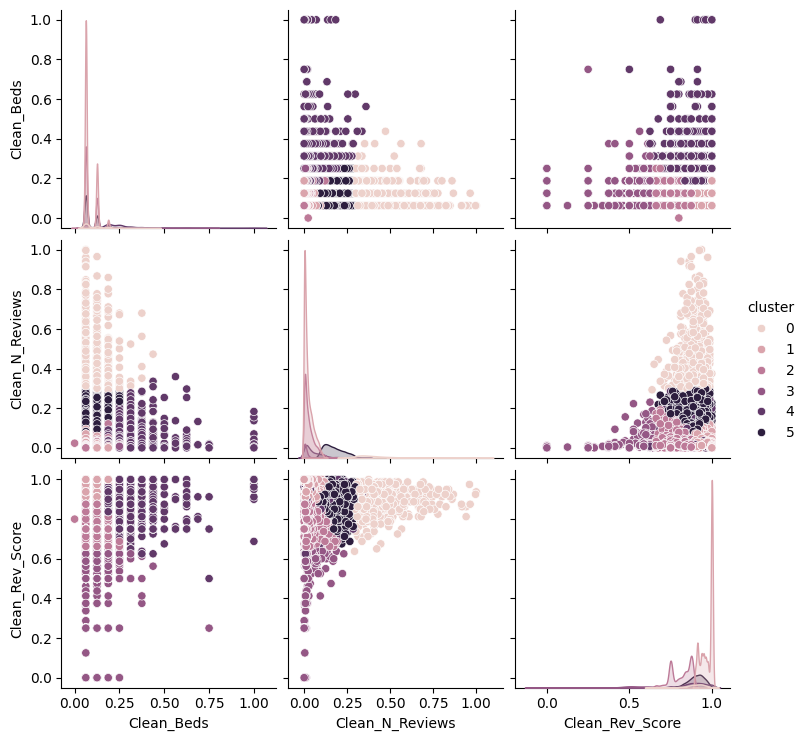

In [61]:
#4
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=Z,hue='cluster')

In [63]:
#5
X['cluster'] = model.labels_
X.loc[:,['Clean_Price','cluster'] ].groupby('cluster').describe()

Clean_Price                                                       \
              count        mean         std   min     25%    50%     75%   
cluster                                                                    
0             794.0  133.238035   83.077776  27.0   80.00  110.0  168.50   
1           10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00   
2            5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   
3             632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   
4            1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   
5            3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   

                  
             max  
cluster           
0          875.0  
1        10000.0  
2         5000.0  
3         5000.0  
4         4500.0  
5         1000.0

In [64]:
#group 4 has a very high average price compared to the rest of the groups, about double.
#The others are all similar magnitude

Text(0.5, 1.0, 'Scree Plot')

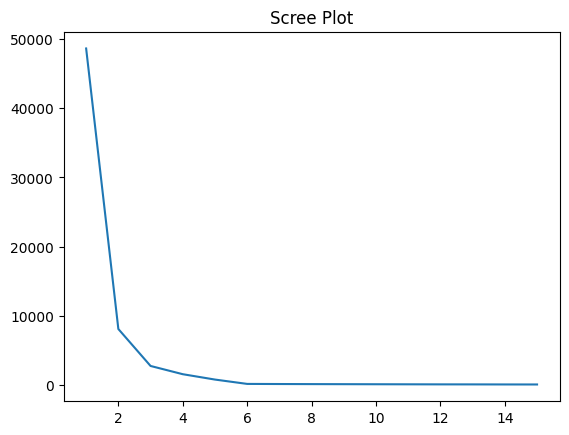

In [65]:
#6
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

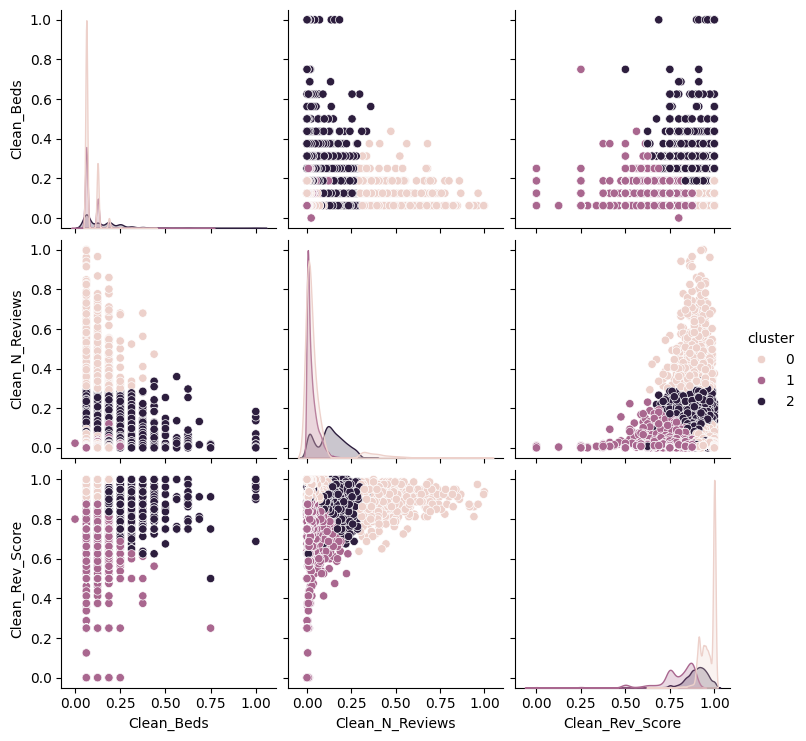

In [67]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

In [69]:
X['cluster'] = model.labels_
X.loc[:,['Clean_Price','cluster'] ].groupby('cluster').describe()

Clean_Price                                                     \
              count        mean         std   min   25%    50%     75%   
cluster                                                                  
0           11306.0  150.899345  143.791840  10.0  85.0  129.0  189.00   
1            6186.0  131.710152  119.136944  20.0  75.0  110.0  168.75   
2            4663.0  194.830152  184.264122  22.0  99.0  150.0  225.00   

                  
             max  
cluster           
0        10000.0  
1         5000.0  
2         4500.0

In [70]:
#The prices are still slightly off but closer than before

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
#1

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

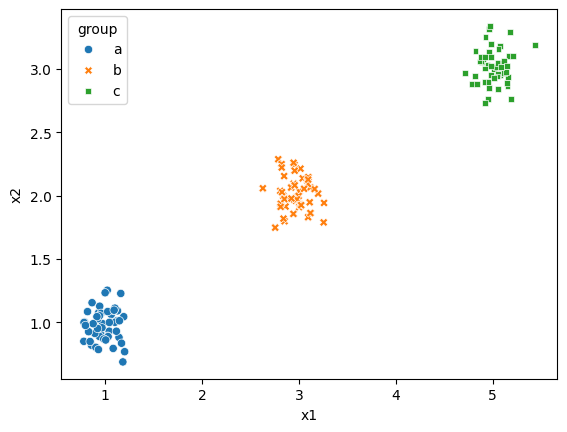

In [5]:
#2
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

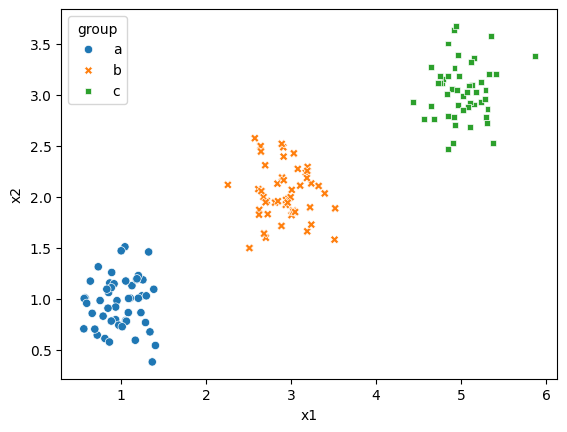

In [6]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

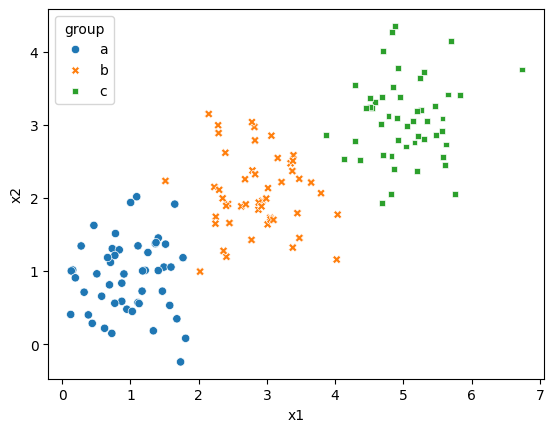

In [7]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

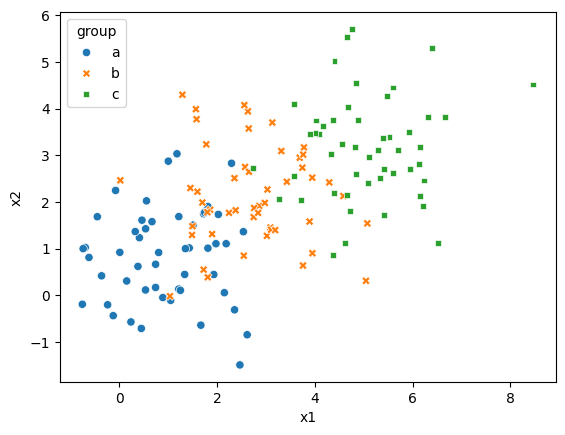

In [8]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

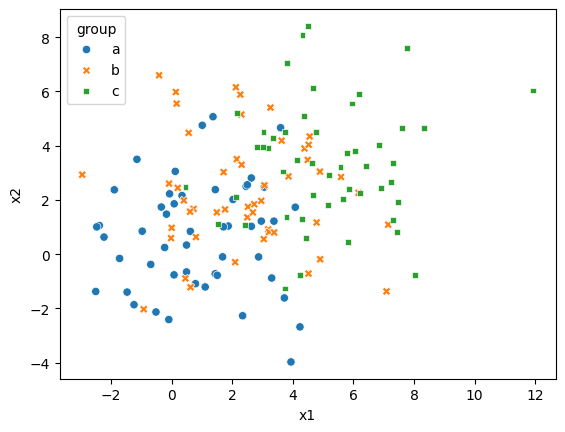

In [9]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

In [10]:
#as the noise goes up the clusters get less and less defined until they ultimately all mix together

In [11]:
#3

from sklearn.cluster import KMeans

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data):
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

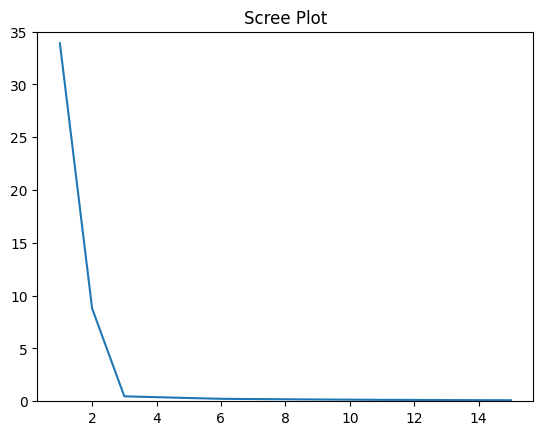

In [19]:
scree(data = df0_125)

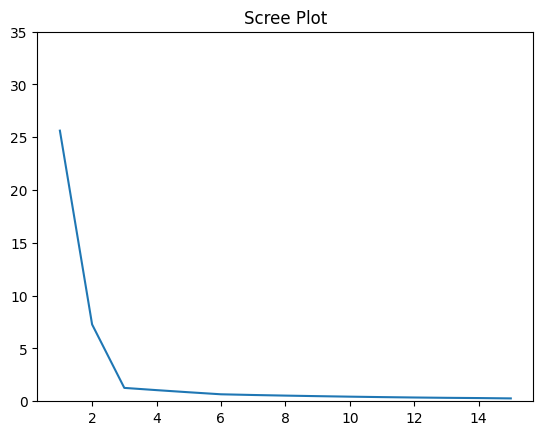

In [18]:
scree(data = df0_25)

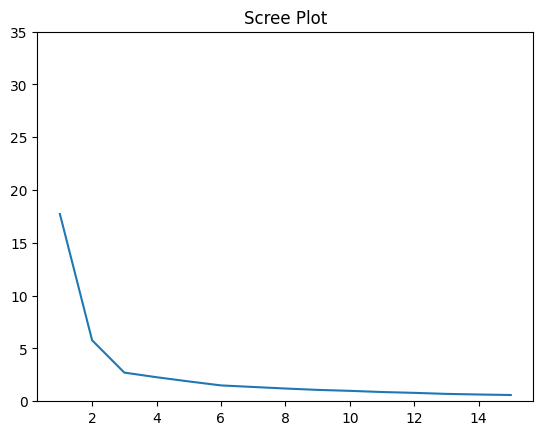

In [17]:
scree(data = df0_5)

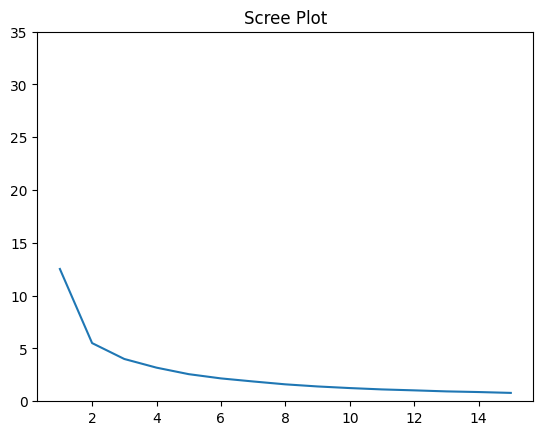

In [16]:
scree(df1_0)

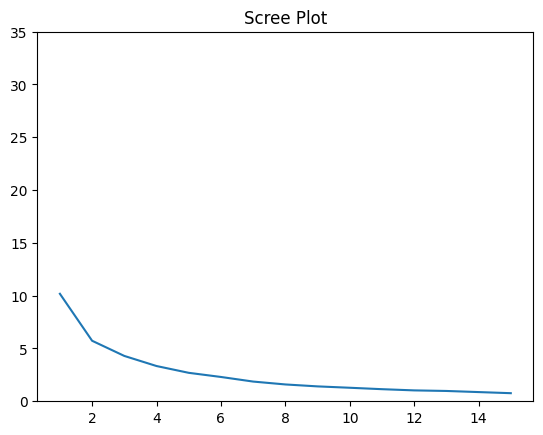

In [20]:
scree(df2_0)

In [21]:
#as the noise increases more and more it gets harder to see an elbow and this makes it challenging to find the right k

In [22]:
#4
#The intuition of the elbow is that on a scree plot, the right K value will be found on the elbow. The right K value is one which finds
#The number of clusters that a group of data should have that will minimize the SSE and still be a useful value.
#As the noise increases, it gets harder for the scree plot to show a value for K because the data is all mixed together
#and there aren't clear groups.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?